**QUÁ TRÌNH DATA MINING**

**LỚP IS217.P13**

1.   22520372 - Nguyễn Thị Hải Hà
2.   22520443 - Nguyễn Thị Thanh Hiếu



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style

import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Đọc dữ liệu đầu vào từ file csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Gắn Drive
file_path = '/content/drive/My Drive/IS217P13_22520372_22520443/Data/Retail_dataset.csv'
data = pd.read_csv(file_path)  # Đọc file CSV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Xem xét dữ liệu ban đầu

In [ ]:
data.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

Thống kê các chỉ số định lượng trên dữ liệu hiện tại

In [ ]:
data.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


Kiểm tra dữ liệu bị thiếu, dữ liệu bị trùng

In [ ]:
print('Số lượng dòng bị trùng trong tập dữ liệu:', data.duplicated().sum())
print('Số lượng dòng bị thiếu dữ liệu:' , sum(data.isna().sum()))

Số lượng dòng bị trùng trong tập dữ liệu: 4
Số lượng dòng bị thiếu dữ liệu: 8383


In [ ]:
print('Số lượng giá trị thiếu (NaN) đối với mỗi cột:')
print(data.isna().sum())

Số lượng giá trị thiếu (NaN) đối với mỗi cột:
Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64


Xóa các dòng dữ liệu trùng

In [ ]:
data.drop_duplicates(keep='first',inplace=True)

Điền giá trị còn thiếu của cột Country dựa trên những dòng dữ liệu khác có cùng State và City. Thực hiện tương tự đối với cột State và City

In [ ]:
#Hàm điền dữ liệu còn thiếu cho cột Country
def fill_missing_country(row):
    if pd.isna(row["Country"]):
        # Lọc các dòng cùng State và City
        group = data[(data["State"] == row["State"]) & (data["City"] == row["City"])]
        # Lấy giá trị phổ biến nhất của Country
        mode_country = group["Country"].mode()
        if not mode_country.empty:
            return mode_country[0]
    return row["Country"]

# Hàm điền dữ liệu thiếu cho cột State
def fill_missing_state(row):
    if pd.isna(row["State"]):
        # Lọc các dòng có cùng City và Country
        group = data[(data["City"] == row["City"]) & (data["Country"] == row["Country"])]
        # Lấy giá trị phổ biến nhất của State
        mode_state = group["State"].mode()
        if not mode_state.empty:
            return mode_state[0]
    return row["State"]

# Hàm điền dữ liệu thiếu cho cột City
def fill_missing_city(row):
    if pd.isna(row["City"]):
        # Lọc các dòng có cùng State và Country
        group = data[(data["State"] == row["State"]) & (data["Country"] == row["Country"])]
        # Lấy giá trị phổ biến nhất của City
        mode_city = group["City"].mode()
        if not mode_city.empty:
            return mode_city[0]
    return row["City"]


data["Country"] = data.apply(fill_missing_country, axis=1)
data["State"] = data.apply(fill_missing_state, axis=1)
data["City"] = data.apply(fill_missing_city, axis=1)

Điền giá trị còn thiếu cho thuộc tính Age, bằng giá trị Age trung bình của những người có cùng Country, State, City

In [ ]:
# Hàm điền tuổi trung bình theo nhóm (Country, State, City)
def fill_age_by_group(row):
    if pd.isna(row['Age']):
        # Lọc các dòng có cùng Country, State và City
        group = data[(data['Country'] == row['Country']) &
                     (data['State'] == row['State']) &
                     (data['City'] == row['City'])]
        # Tính giá trị trung bình của Age
        mean_age = group['Age'].mean()
        if not pd.isna(mean_age):
            return mean_age
    return row['Age']


data['Age'] = data.apply(fill_age_by_group, axis=1)

Điền dữ liệu còn thiếu cho Gender

In [ ]:
# Điền giá trị phổ biến nhất cho Gender
data['Gender'] = data['Gender'].replace({'': None, ' ': None}).fillna(data['Gender'].mode()[0])

Điền dữ liệu còn thiếu cho Income, Customer_Segment

In [ ]:
# Điền giá trị phổ biến nhất cho Gender
data['Gender'] = data['Gender'].replace({'': None, ' ': None}).fillna(data['Gender'].mode()[0])

# Hàm điền giá trị thiếu của Income dựa trên nhóm Customer_Segment
def fill_income_by_segment(row):
    if pd.isna(row['Income']):
        # Lọc các dòng có cùng Customer_Segment
        group = data[data['Customer_Segment'] == row['Customer_Segment']]
        # Tính giá trị phổ biến nhất của Income
        mode_income = group['Income'].mode()
        if not mode_income.empty:
            return mode_income[0]
    return row['Income']

# Hàm điền giá trị thiếu của Customer_Segment dựa trên nhóm Income
def fill_segment_by_income(row):
    if pd.isna(row['Customer_Segment']):
        # Lọc các dòng có cùng Income
        group = data[data['Income'] == row['Income']]
        # Tính giá trị phổ biến nhất của Customer_Segment
        mode_segment = group['Customer_Segment'].mode()
        if not mode_segment.empty:
            return mode_segment[0]
    return row['Customer_Segment']


data['Income'] = data.apply(fill_income_by_segment, axis=1)
data['Customer_Segment'] = data.apply(fill_segment_by_income, axis=1)

Dựa trên thuộc tính Date, điền giá trị còn thiếu của thuộc tính Year và thuộc tính Month

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')
# Hàm điền giá trị cho cột Year từ cột Date
def fill_year_from_date(row):
    if pd.isna(row['Year']) and pd.notna(row['Date']):
        return row['Date'].year
    return row['Year']

#Vì cột Month sẵn có giá trị không chính xác so với cột Date nên lấy giá trị Month từ cột Date
# Xóa cột 'Month'
data = data.drop(columns=['Month'])
# Tạo cột Month từ cột Date
data['Month'] = data['Date'].dt.month

# Tạo cột 'Quarter' từ cột 'Month'
def get_quarter(month):
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    elif month in [10, 11, 12]:
        return 4


data['Year'] = data.apply(fill_year_from_date, axis=1)
data['Quarter'] = data['Month'].apply(get_quarter)

Điền giá trị còn thiếu cho Product_Category và Product_Brand

In [ ]:
# Hàm điền giá trị thiếu cho Product_Category dựa trên Product_Brand và Product_Type
def fill_category_by_brand_and_type(row):
    if pd.isna(row['Product_Category']):
        # Lọc các dòng có cùng Product_Brand và Product_Type
        group = data[
            (data['Product_Brand'] == row['Product_Brand']) &
            (data['Product_Type'] == row['Product_Type'])
        ]
        # Tính giá trị phổ biến nhất Product_Category
        mode_category = group['Product_Category'].mode()
        if not mode_category.empty:
            return mode_category[0]
    return row['Product_Category']

# Hàm điền giá trị thiếu cho Product_Brand dựa trên Product_Category và Product_Type
def fill_brand_by_category_and_type(row):
    if pd.isna(row['Product_Brand']):
        # Lọc các dòng có cùng Product_Category và Product_Type
        group = data[
            (data['Product_Category'] == row['Product_Category']) &
            (data['Product_Type'] == row['Product_Type'])
        ]
        # Tính giá trị phổ biến nhất của Product_Brand
        mode_brand = group['Product_Brand'].mode()
        if not mode_brand.empty:
            return mode_brand[0]
    return row['Product_Brand']


data['Product_Category'] = data.apply(fill_category_by_brand_and_type, axis=1)
data['Product_Brand'] = data.apply(fill_brand_by_category_and_type, axis=1)

Điền dữ liệu còn thiếu cho các cột Total_Amount, Amount, Total_Purchases

In [ ]:
# Điền Total_Purchases nếu bị thiếu
def fill_total_purchases(row):
    if pd.isna(row['Total_Purchases']) and pd.notna(row['Total_Amount']) and pd.notna(row['Amount']):
        return row['Total_Amount'] / row['Amount']
    return row['Total_Purchases']

# Điền Total_Amount nếu bị thiếu
def fill_total_amount(row):
    if pd.isna(row['Total_Amount']) and pd.notna(row['Total_Purchases']) and pd.notna(row['Amount']):
        return row['Total_Purchases'] * row['Amount']
    return row['Total_Amount']

# Điền Amount nếu bị thiếu
def fill_amount(row):
    if pd.isna(row['Amount']) and pd.notna(row['Total_Amount']) and pd.notna(row['Total_Purchases']):
        return row['Total_Amount'] / row['Total_Purchases']
    return row['Amount']


data['Total_Purchases'] = data.apply(fill_total_purchases, axis=1)
data['Total_Amount'] = data.apply(fill_total_amount, axis=1)
data['Amount'] = data.apply(fill_amount, axis=1)

Điền giá trị còn thiếu cho Feedback và Ratings

In [ ]:
# Hàm điền giá trị cho cột Ratings và Feedback
def fill_feedback_and_ratings(row):
    if pd.isna(row['Ratings']) and pd.notna(row['Feedback']):
        if row['Feedback'] == 'Excellent':
            return random.choice([4, 5])
        elif row['Feedback'] == 'Good':
            return 3
        elif row['Feedback'] == 'Average':
            return 2
        elif row['Feedback'] == 'Bad':
            return 1
    return row['Ratings']

# Điền Feedback nếu bị thiếu dựa trên Ratings
def fill_feedback(row):
    if pd.isna(row['Feedback']) and pd.notna(row['Ratings']):
        if row['Ratings'] == 4 or row['Ratings'] == 5:
            return 'Excellent'
        elif row['Ratings'] == 3:
            return 'Good'
        elif row['Ratings'] == 2:
            return 'Average'
        elif row['Ratings'] == 1:
            return 'Bad'
    return row['Feedback']


data['Ratings'] = data.apply(fill_feedback_and_ratings, axis=1)
data['Feedback'] = data.apply(fill_feedback, axis=1)

Xóa các cột không cần thiết (Transaction_ID, Customer_ID, Email, Phone, Address, Zipcode, Time) và xóa các dòng bị thiếu dữ liệu ở các cột

In [ ]:
# Xóa cột không cần thiết
data = data.drop(['Transaction_ID', 'Customer_ID', 'Name', 'Email',
                  'Phone', 'Address', 'Zipcode', 'Date', 'Time'], axis=1)

# Xóa các dòng trống ở các cột cụ thể
columns_to_check = ['State', 'Country', 'Income', 'Customer_Segment', 'Month',
                    'Amount', 'Total_Amount', 'Feedback', 'Shipping_Method',
                    'Payment_Method', 'Order_Status', 'Ratings', 'Quarter']
data = data.dropna(subset=columns_to_check)

print(data.isna().sum())

City                0
State               0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Year                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
Month               0
Quarter             0
dtype: int64


Thống kê mô tả

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,300593.0,35.489522,15.020041,18.000000,22.000000,32.000000,46.000000,70.000000
Year,300593.0,2023.165064,0.371239,2023.000000,2023.000000,2023.000000,2023.000000,2024.000000
Total_Purchases,300593.0,5.359912,2.868377,1.000000,3.000000,5.000000,8.000000,10.000000
Amount,300593.0,255.124646,141.383368,10.000219,132.863869,255.429750,377.577728,499.997911
Total_Amount,300593.0,1367.514316,1128.708819,10.003750,438.872391,1041.104553,2029.888600,4999.625796
Ratings,300593.0,3.162705,1.320823,1.000000,2.000000,3.000000,4.000000,5.000000
Month,300593.0,6.505870,3.452089,1.000000,4.000000,7.000000,10.000000,12.000000
Quarter,300593.0,2.502856,1.118528,1.000000,2.000000,3.000000,4.000000,4.000000


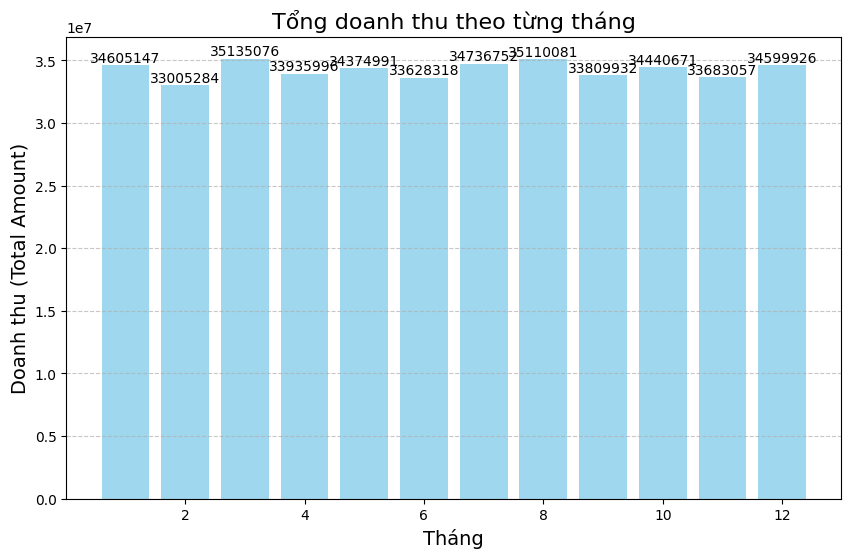

In [ ]:
# Thống kê tổng doanh thu theo từng tháng
monthly_revenue = data.groupby('Month')['Total_Amount'].sum().reset_index()

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 6))
plt.bar(monthly_revenue['Month'], monthly_revenue['Total_Amount'], color='skyblue', alpha=0.8)

plt.title('Tổng doanh thu theo từng tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Doanh thu (Total Amount)', fontsize=14)

# Hiển thị giá trị trên cột
for i, value in enumerate(monthly_revenue['Total_Amount']):
    plt.text(monthly_revenue['Month'][i], value, f'{value:.0f}', ha='center', va='bottom', fontsize=10)

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Chuyển đổi các cột object thành các giá trị số (Label Encoding cho cột categorical)
label_encoders = {}
categorical_columns = ['City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment',
                       'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
                       'Shipping_Method', 'Payment_Method', 'Order_Status', 'products']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Tính tổng doanh thu theo tháng
monthly_revenue = data.groupby('Month')['Total_Amount'].sum().reset_index()
# Chuẩn hóa tổng doanh thu trong khoảng [0, 1] bằng MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
monthly_revenue['Total_Amount_normalized'] = scaler.fit_transform(monthly_revenue[['Total_Amount']])

In [ ]:
data.head(20)

,City,State,Country,Age,Gender,Income,Customer_Segment,Year,Total_Purchases,Amount,...,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Month,Quarter
0,35,4,2,21.0,1,1,2,2023.0,3.0,108.028757,...,10,23,2,1,2,3,5.0,86,9.0,3.0
1,87,9,3,19.0,0,1,1,2023.0,2.0,403.353907,...,14,28,2,2,1,2,4.0,164,12.0,4.0
2,46,33,0,48.0,1,1,2,2023.0,3.0,354.477600,...,11,3,0,1,1,2,2.0,268,4.0,2.0
3,40,39,1,56.0,1,0,1,2023.0,7.0,352.407717,...,6,31,2,2,3,2,4.0,301,5.0,2.0
4,20,9,3,22.0,1,1,1,2024.0,2.0,124.276524,...,9,4,1,2,0,3,1.0,58,1.0,1.0
5,19,33,0,58.0,0,2,1,2023.0,4.0,296.291806,...,1,28,3,0,3,1,4.0,164,9.0,3.0
6,60,39,1,29.0,0,1,0,2023.0,2.0,315.057648,...,14,29,1,2,0,2,1.0,228,6.0,2.0
7,80,4,2,29.0,1,2,1,2023.0,1.0,46.588070,...,17,21,1,1,0,2,1.0,101,3.0,1.0
8,128,33,0,46.0,1,2,0,2024.0,8.0,328.839302,...,9,4,1,1,0,0,1.0,88,1.0,1.0
9,28,4,2,25.0,1,2,0,2023.0,10.0,397.611229,...,6,6,2,2,0,0,4.0,45,10.0,4.0


In [ ]:
# Chọn cột làm features và target
features = ['Month']
target = 'Total_Amount_normalized'

# Tách dữ liệu thành X và y
X = monthly_revenue[features]
y = monthly_revenue[target]

In [ ]:
# Tách dữ liệu thành training set và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Kiểm tra kích thước tập dữ liệu
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (9, 1) (9,)
Test set: (3, 1) (3,)


In [ ]:
# Đánh giá mô hình
def metrics(model, x_test, y_test):
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print('Mean Square Error: ', round(mse, 4))
    print('Root Mean Squared Error: ', round(rmse, 4))
    print('Mean Absolute Error: ', round(mae, 4))

    return (mse, rmse, mae)

**Random Forest**

In [ ]:
# Khởi tạo mô hình Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, min_samples_split=20, min_samples_leaf=5)

# Huấn luyện mô hình trên tập train
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=20,
                      random_state=42)

In [ ]:
# In kết quả đánh giá
print("Random Forest Regressor Model:")
rf_metrics = metrics(rf_model, X_test, y_test)

Random Forest Regressor Model:
Mean Square Error:  0.037
Root Mean Squared Error:  0.1923
Mean Absolute Error:  0.1626


Dự đoán doanh thu 6 tháng tiếp theo

In [ ]:
# Tạo dữ liệu cho 6 tháng tiếp theo
future_months = pd.DataFrame({
    'Month': [4, 5, 6, 7, 8, 9],  # Các tháng tiếp theo
})
future_months['Month'] = future_months['Month'].astype(int)

# Dự đoán tổng doanh thu cho 6 tháng tiếp theo
future_predictions = rf_model.predict(future_months)

# Chuyển đổi các giá trị chuẩn hóa trở lại dạng gốc
# Cần lấy min và max từ dữ liệu của tổng doanh thu ban đầu
min_value = monthly_revenue['Total_Amount'].min()
max_value = monthly_revenue['Total_Amount'].max()

# Dự đoán đã chuẩn hóa cần được chuyển về giá trị gốc
predicted_total_amounts = future_predictions * (max_value - min_value) + min_value

# Kết quả dự đoán
future_months['Predicted_Total_Amount'] = predicted_total_amounts
print(future_months)

   Month  Predicted_Total_Amount
0      4            3.432382e+07
1      5            3.432382e+07
2      6            3.432382e+07
3      7            3.432382e+07
4      8            3.432382e+07
5      9            3.432382e+07


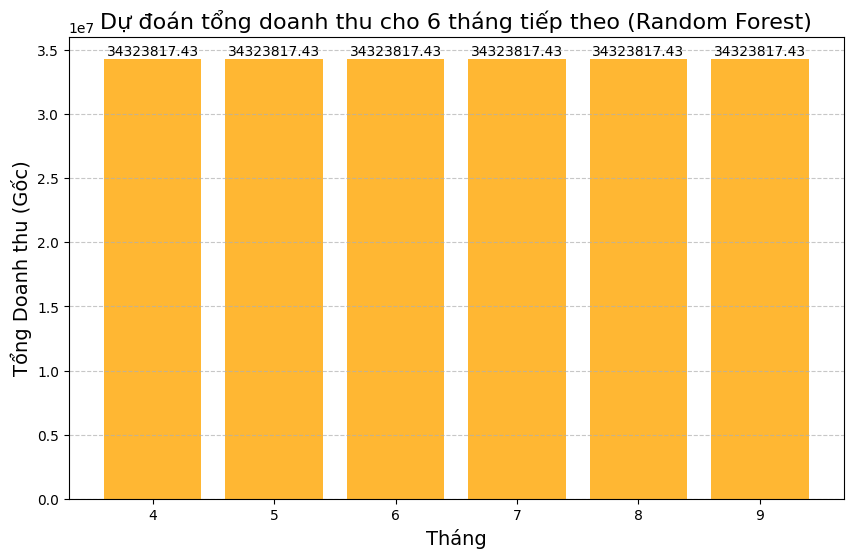

In [ ]:
# Vẽ biểu đồ cột cho dự đoán tổng doanh thu
plt.figure(figsize=(10, 6))

# Biểu đồ cột
plt.bar(future_months['Month'], future_months['Predicted_Total_Amount'], color='orange', alpha=0.8)

# Thêm tiêu đề và nhãn
plt.title('Dự đoán tổng doanh thu cho 6 tháng tiếp theo (Random Forest)', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Tổng Doanh thu (Gốc)', fontsize=14)

# Hiển thị giá trị trên cột
for i, value in enumerate(future_months['Predicted_Total_Amount']):
    plt.text(future_months['Month'][i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**XGBoost**

In [ ]:
# Chuẩn hóa tổng doanh thu trong khoảng [0, 1] bằng MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
monthly_revenue['Total_Amount_normalized'] = scaler.fit_transform(monthly_revenue[['Total_Amount']])

# Chọn cột làm features và target
features = ['Month']
target = 'Total_Amount_normalized'

# Tách dữ liệu thành X và y
X = monthly_revenue[features]
y = monthly_revenue[target]

# Tách dữ liệu thành training set và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1)

# Huấn luyện mô hình trên tập train
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# In kết quả đánh giá
print("XGBoost Regressor Model:")
xgb_metrics = metrics(xgb_model, X_test, y_test)

XGBoost Regressor Model:
Mean Square Error:  0.2166
Root Mean Squared Error:  0.4654
Mean Absolute Error:  0.3678


Dự đoán doanh thu 6 tháng tiếp theo

In [ ]:
# Tạo dữ liệu cho 6 tháng tiếp theo
future_months = pd.DataFrame({
    'Month': [4, 5, 6, 7, 8, 9],  # Các tháng tiếp theo
})
future_months['Month'] = future_months['Month'].astype(int)

# Dự đoán tổng doanh thu cho 6 tháng tiếp theo
future_predictions = rf_model.predict(future_months)

# Chuyển đổi các giá trị chuẩn hóa trở lại dạng gốc
# Cần lấy min và max từ dữ liệu của tổng doanh thu ban đầu
min_value = monthly_revenue['Total_Amount'].min()
max_value = monthly_revenue['Total_Amount'].max()

# Dự đoán đã chuẩn hóa cần được chuyển về giá trị gốc
predicted_total_amounts = future_predictions * (max_value - min_value) + min_value

# Kết quả dự đoán
future_months['Predicted_Total_Amount'] = predicted_total_amounts
print(future_months)

   Month  Predicted_Total_Amount
0      4            3.432382e+07
1      5            3.432382e+07
2      6            3.432382e+07
3      7            3.432382e+07
4      8            3.432382e+07
5      9            3.432382e+07


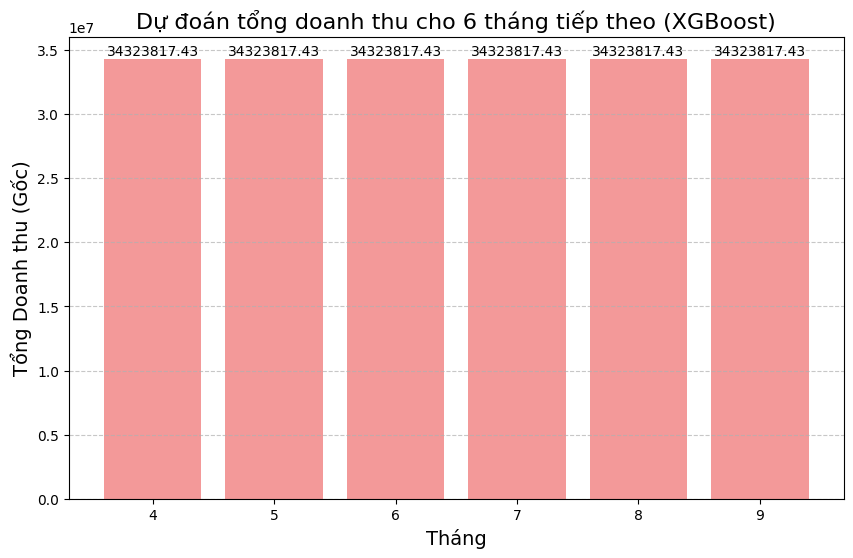

In [ ]:
# Vẽ biểu đồ cột cho dự đoán tổng doanh thu
plt.figure(figsize=(10, 6))

# Biểu đồ cột
plt.bar(future_months['Month'], future_months['Predicted_Total_Amount'], color='lightcoral', alpha=0.8)

# Thêm tiêu đề và nhãn
plt.title('Dự đoán tổng doanh thu cho 6 tháng tiếp theo (XGBoost)', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Tổng Doanh thu (Gốc)', fontsize=14)

# Hiển thị giá trị trên cột
for i, value in enumerate(future_months['Predicted_Total_Amount']):
    plt.text(future_months['Month'][i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**LightGBM**

In [ ]:
# Chuẩn hóa tổng doanh thu trong khoảng [0, 1] bằng MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
monthly_revenue['Total_Amount_normalized'] = scaler.fit_transform(monthly_revenue[['Total_Amount']])

# Chọn cột làm features và target
features = ['Month']
target = 'Total_Amount_normalized'

# Tách dữ liệu thành X và y
X = monthly_revenue[features]
y = monthly_revenue[target]

# Tách dữ liệu thành training set và test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Khởi tạo mô hình LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)

# Huấn luyện mô hình trên tập train
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 9, number of used features: 0
[LightGBM] [Info] Start training from score 0.588936
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

LGBMRegressor(random_state=42)

In [ ]:
# In kết quả đánh giá
print("LightGBM Model:")
lgb_metrics = metrics(lgb_model, X_test, y_test)

LightGBM Model:
Mean Square Error:  0.0356
Root Mean Squared Error:  0.1887
Mean Absolute Error:  0.1727


Dự đoán doanh thu 6 tháng tiếp theo

In [ ]:
# Tạo dữ liệu cho 6 tháng tiếp theo
future_months = pd.DataFrame({
    'Month': [4, 5, 6, 7, 8, 9],  # Các tháng tiếp theo
})
future_months['Month'] = future_months['Month'].astype(int)

# Dự đoán tổng doanh thu cho 6 tháng tiếp theo
future_predictions = rf_model.predict(future_months)

# Chuyển đổi các giá trị chuẩn hóa trở lại dạng gốc
# Cần lấy min và max từ dữ liệu của tổng doanh thu ban đầu
min_value = monthly_revenue['Total_Amount'].min()
max_value = monthly_revenue['Total_Amount'].max()

# Dự đoán đã chuẩn hóa cần được chuyển về giá trị gốc
predicted_total_amounts = future_predictions * (max_value - min_value) + min_value

# Kết quả dự đoán
future_months['Predicted_Total_Amount'] = predicted_total_amounts
print(future_months)

   Month  Predicted_Total_Amount
0      4            3.432382e+07
1      5            3.432382e+07
2      6            3.432382e+07
3      7            3.432382e+07
4      8            3.432382e+07
5      9            3.432382e+07


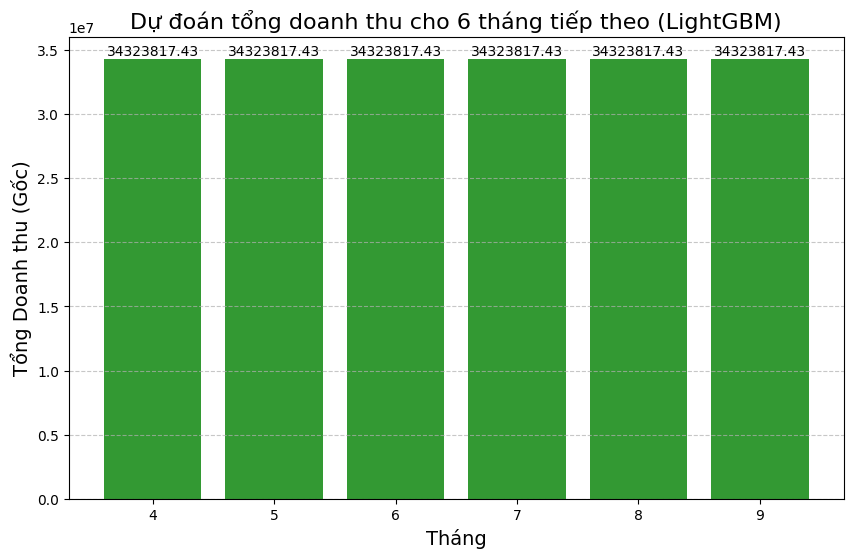

In [ ]:
# Vẽ biểu đồ cột cho dự đoán tổng doanh thu
plt.figure(figsize=(10, 6))

# Biểu đồ cột
plt.bar(future_months['Month'], future_months['Predicted_Total_Amount'], color='green', alpha=0.8)

# Thêm tiêu đề và nhãn
plt.title('Dự đoán tổng doanh thu cho 6 tháng tiếp theo (LightGBM)', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Tổng Doanh thu (Gốc)', fontsize=14)

# Hiển thị giá trị trên cột
for i, value in enumerate(future_months['Predicted_Total_Amount']):
    plt.text(future_months['Month'][i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Hiển thị biểu đồ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()